<a href="https://colab.research.google.com/github/saincoder404/xeven_AI/blob/master/Lecture_20_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(10,5)

In [42]:
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [43]:
#load_dataset
full_data = pd.read_csv('/content/titanic_cleaned.csv')

In [44]:
# Data shape
full_data.shape

(889, 9)

In [45]:
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    int64  
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [47]:
# now separate future and target varibales

x = full_data.drop('Survived', axis = 1)

y = full_data['Survived']

In [48]:
 # use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=101)

In [49]:
print(f'Shape of x train: {x_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print('---'*10)
print(f'Shape of x test: {x_test.shape}')
print(f'Shape of y test: {x_test.shape}')

Shape of x train: (711, 8)
Shape of y train: (711,)
------------------------------
Shape of x test: (178, 8)
Shape of y test: (178, 8)


# *Logistic Regression*

In [50]:
# Model training
from sklearn.linear_model import LogisticRegression

# create instance of model
model = LogisticRegression()

model.fit(x_train, y_train)


LogisticRegression()

# ***Model Evaulation***

In [51]:
# logistic regression

from sklearn.metrics import accuracy_score

# production from the model
y_pred_model = model.predict(x_test)

print('Logistic regression score')

log_reg_accuracy = round(accuracy_score(y_test,y_pred_model)*100,2)

print(f'Accuracy % {log_reg_accuracy}')

Logistic regression score
Accuracy % 82.02


confusion matrix

In [52]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#calculate precision and recall
precision = precision_score(y_test,y_pred_model)
recall = recall_score(y_test,y_pred_model)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# confusion matrix
print('Confusion:')
confusion = confusion_matrix(y_test,y_pred_model)
print(confusion)

Precision: 0.85
Recall: 0.66
Confusion:
[[99  8]
 [24 47]]


<Axes: >

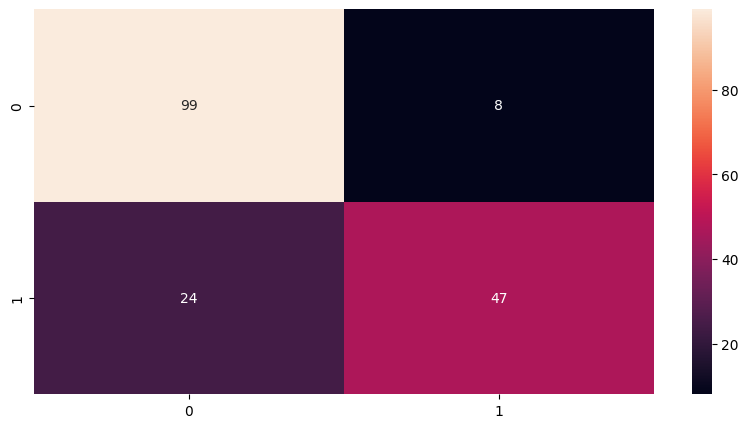

In [53]:
sns.heatmap(confusion, annot = True, fmt="d")

Decision tree

In [54]:
# Model training
from sklearn.tree import DecisionTreeClassifier

# create instance of model
Dtree = DecisionTreeClassifier()

Dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
# Decision Tree

from sklearn.metrics import accuracy_score

# production from the model
y_pred_model1 = Dtree.predict(x_test)

print('Decision Tree score')

Dtree_accuracy = round(accuracy_score(y_test,y_pred_model1)*100,2)

print(f'Accuracy % {Dtree_accuracy}')

Decision Tree score
Accuracy % 79.21


confusion matrix

In [57]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#calculate precision and recall
precision = precision_score(y_test,y_pred_model1)
recall = recall_score(y_test,y_pred_model1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# confusion matrix
print('Confusion:')
confusion = confusion_matrix(y_test,y_pred_model1)
print(confusion)

Precision: 0.72
Recall: 0.77
Confusion:
[[86 21]
 [16 55]]


<Axes: >

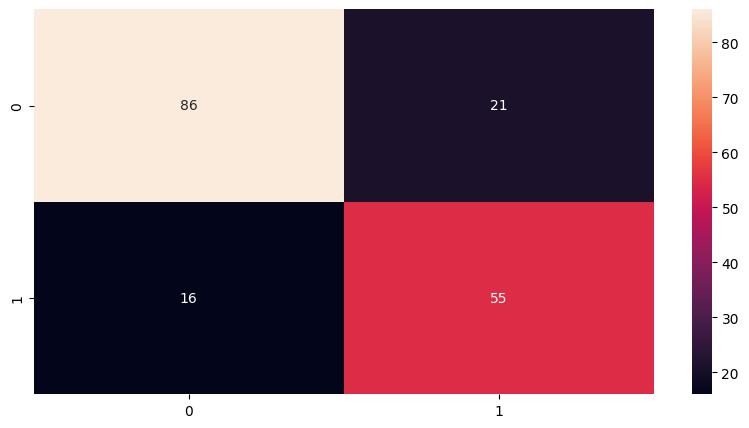

In [58]:
sns.heatmap(confusion, annot = True, fmt="d")

# ***Random forest***

In [61]:
# Model training
from sklearn.ensemble import RandomForestClassifier

# create instance of model
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
# Decision Tree

from sklearn.metrics import accuracy_score

# production from the model
y_pred_model2 = rfc.predict(x_test)

print('RandomForestClassifier')

rfc_accuracy = round(accuracy_score(y_test,y_pred_model2)*100,2)

print(f'Accuracy % {rfc_accuracy}')

RandomForestClassifier
Accuracy % 83.71


In [65]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#calculate precision and recall
precision = precision_score(y_test,y_pred_model2)
recall = recall_score(y_test,y_pred_model2)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# confusion matrix
print('Confusion:')
confusion = confusion_matrix(y_test,y_pred_model2)
print(confusion)

Precision: 0.80
Recall: 0.79
Confusion:
[[93 14]
 [15 56]]


<Axes: >

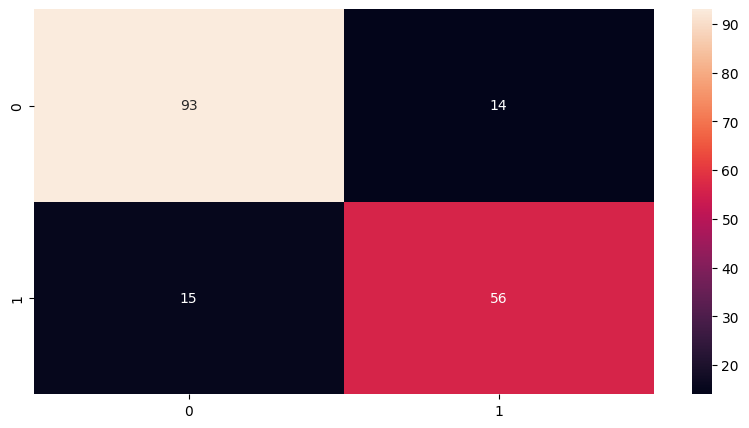

In [66]:
sns.heatmap(confusion, annot = True, fmt="d")

# ***Gradient Boosting Classifer***

In [67]:
# Model training
from sklearn.ensemble import GradientBoostingClassifier

# create instance of model
gbc = RandomForestClassifier()

gbc.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
# GradientBoostingClassifier

from sklearn.metrics import accuracy_score

# production from the model
y_pred_model3 = gbc.predict(x_test)

print('GradientBoostingClassifier')

rfc_accuracy = round(accuracy_score(y_test,y_pred_model3)*100,2)

print(f'Accuracy % {rfc_accuracy}')

GradientBoostingClassifier
Accuracy % 82.58


In [69]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#calculate precision and recall
precision = precision_score(y_test,y_pred_model3)
recall = recall_score(y_test,y_pred_model3)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# confusion matrix
print('Confusion:')
confusion = confusion_matrix(y_test,y_pred_model3)
print(confusion)

Precision: 0.80
Recall: 0.75
Confusion:
[[94 13]
 [18 53]]


<Axes: >

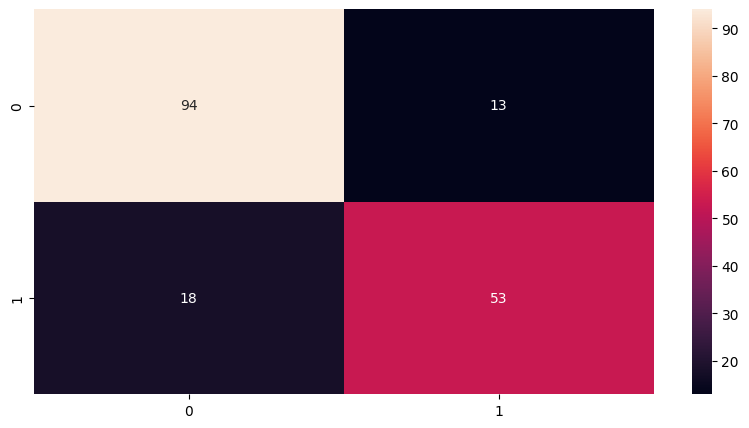

In [70]:
sns.heatmap(confusion, annot = True, fmt="d")